# --------------------------------------------------------
## 1. 📌 Problem Statement
*waldo*

What are we solving and why?

BrightPath Academy faces some challenges that cause them to not be able to fully support each student such as:

- **Delayed identification of At-Risk Students:** BrightPath does not have access to a system that gives them real-time insights to the students who are struggling academically so they are not able to intervene in time.

- **No individual support strategies:** Educators don't have access to a tool that are able to identify the reason for why exactly a specific student is struggling.

- **Unknown effect of Extracurricular activities:** At BrightPath extracurricular involvement is encourage but educators are now unsure if extracurricular activities are the cause of poor academic performance. They want to identify whether this is the cause for poor academic performance.

- **No centralized system for actionable insights:** BrightPath has access to a lot of student data but no system that has the ability to analyze and understand the data.

# --------------------------------------------------------
## 2. 💡 Hypothesis Generation
*waldo*

What do we think is going on in the data?

The following hypotheses will guide our data exploration and modeling:

1. **Study Time and GradeClass**: There is a negative correlation between weekly study time (**StudyTimeWeekly**) and **GradeClass**, for example students who study more hours per week tend to have better grade classifications (lower GradeClass values, e.g., 'A' or 'B').

2. **Absences and GradeClass**: There is a positive correlation between the number of absences (**Absences**) and **GradeClass**, indicating that students with more absences are likely to have weaker grade classifications (higher GradeClass values, e.g., 'D' or 'F').

3. **Tutoring and GradeClass**: Tutoring status (**Tutoring**) is associated with **GradeClass** though it is difficult to know to what extent as the level of quality of the tutoring is not known, thus this will be explored further in the data analysis phase. 

4. **Parental Support and GradeClass**: There is a negative correlation between the level of parental support (**ParentalSupport**) and **GradeClass**, suggesting that higher parental support is linked to better grade classifications.

5. **Extracurricular Activities and GradeClass**: Participation in extracurricular activities (**Extracurricular**) is associated with better **GradeClass**, thus showing a positive impact of these activities on academic performance.

6. **Parental Education and GradeClass**: There is a negative correlation between parental education level (**ParentalEducation**) and **GradeClass**, indicating that students with parents who have higher education levels are more likely to have better grade classifications.

These hypotheses will be tested and refined during the data analysis phase to uncover key factors influencing student performance, with a  focus on the role of extracurricular activities as mentioned in the problem statement

# --------------------------------------------------------
## 3. ⚙️ Setting up the System

In [352]:
#Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


#Loading dataset
df = pd.read_csv('../data/Student_performance_data.csv')


# --------------------------------------------------------
## 4. 🔍 Data Understanding
*tristan*

- **Setting up the System:** Importing libraries and loading data.

- **Data Inspection:** We already know the target feature is GradeClass.

    1. **Preview:** Gives an understanding of the dataset structure (names and general characteristics).

    2. **Information:** Provides overview of data types as well as total entries and columns.
    
    3. **Describe:** Shows a more detailed summary of each features statistics (mean, standard deviation, frequency counts, etc.).

#### preview

In [353]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


#### Data Info

In [354]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


#### Describe the Data

In [355]:
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


### Drawn Conclusions

- **From this information we can gather:**

    1. StudentID can be exluded as it has no effect on other data (it is an identifier).

    2. Data is split up into *Categorical* (Ordinal/Binary) and *Numerical* (Discrete/Continuous):

        - **Categorical:**

            - **Ordinal:**
                - Ethnicity
                - ParentalEducation
                - ParentalSupport
                - GradeClass

            - **Binary:**
                - Gender
                - Tutoring
                - Extracurricular
                - Sports
                - Music
                - Volunteering
        
        - **Numerical:**

            - **Discrete**
                - Age
                - Absences

            - **Continuous**
                - StudyTimeWeekly
                - GPA

    3. Ensure there are no null values before using data.

    4. Encoding may be necessary for some ordinal categorical data depending on the machine learning algorithms.


# --------------------------------------------------------
## 4. 📊 Exploratory Data Analysis
*Brandon*


### i. Univariate Analysis
Is the simplest form of statistical analysis. Comparing one variable at a time to its distribution, mean or outliers.

We will conduct a analysis on the mean of (Age, Gender, Ethnicity, ParentalEducation, StudyTimeWeekly, Absences, Tutoring, ParentalSupport, Extracurricular, GPA, GradeClass)

In [356]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
StudentID,2392.0,2196.500000,690.655244,1001.000000,1598.750000,2196.500000,2794.250000,3392.000000
Age,2392.0,16.468645,1.123798,15.000000,15.000000,16.000000,17.000000,18.000000
Gender,2392.0,0.510870,0.499986,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2392.0,0.877508,1.028476,0.000000,0.000000,0.000000,2.000000,3.000000
ParentalEducation,2392.0,1.746237,1.000411,0.000000,1.000000,2.000000,2.000000,4.000000
StudyTimeWeekly,2392.0,9.771992,5.652774,0.001057,5.043079,9.705363,14.408410,19.978094
Absences,2392.0,14.541388,8.467417,0.000000,7.000000,15.000000,22.000000,29.000000
Tutoring,2392.0,0.301421,0.458971,0.000000,0.000000,0.000000,1.000000,1.000000
ParentalSupport,2392.0,2.122074,1.122813,0.000000,1.000000,2.000000,3.000000,4.000000
Extracurricular,2392.0,0.383361,0.486307,0.000000,0.000000,0.000000,1.000000,1.000000


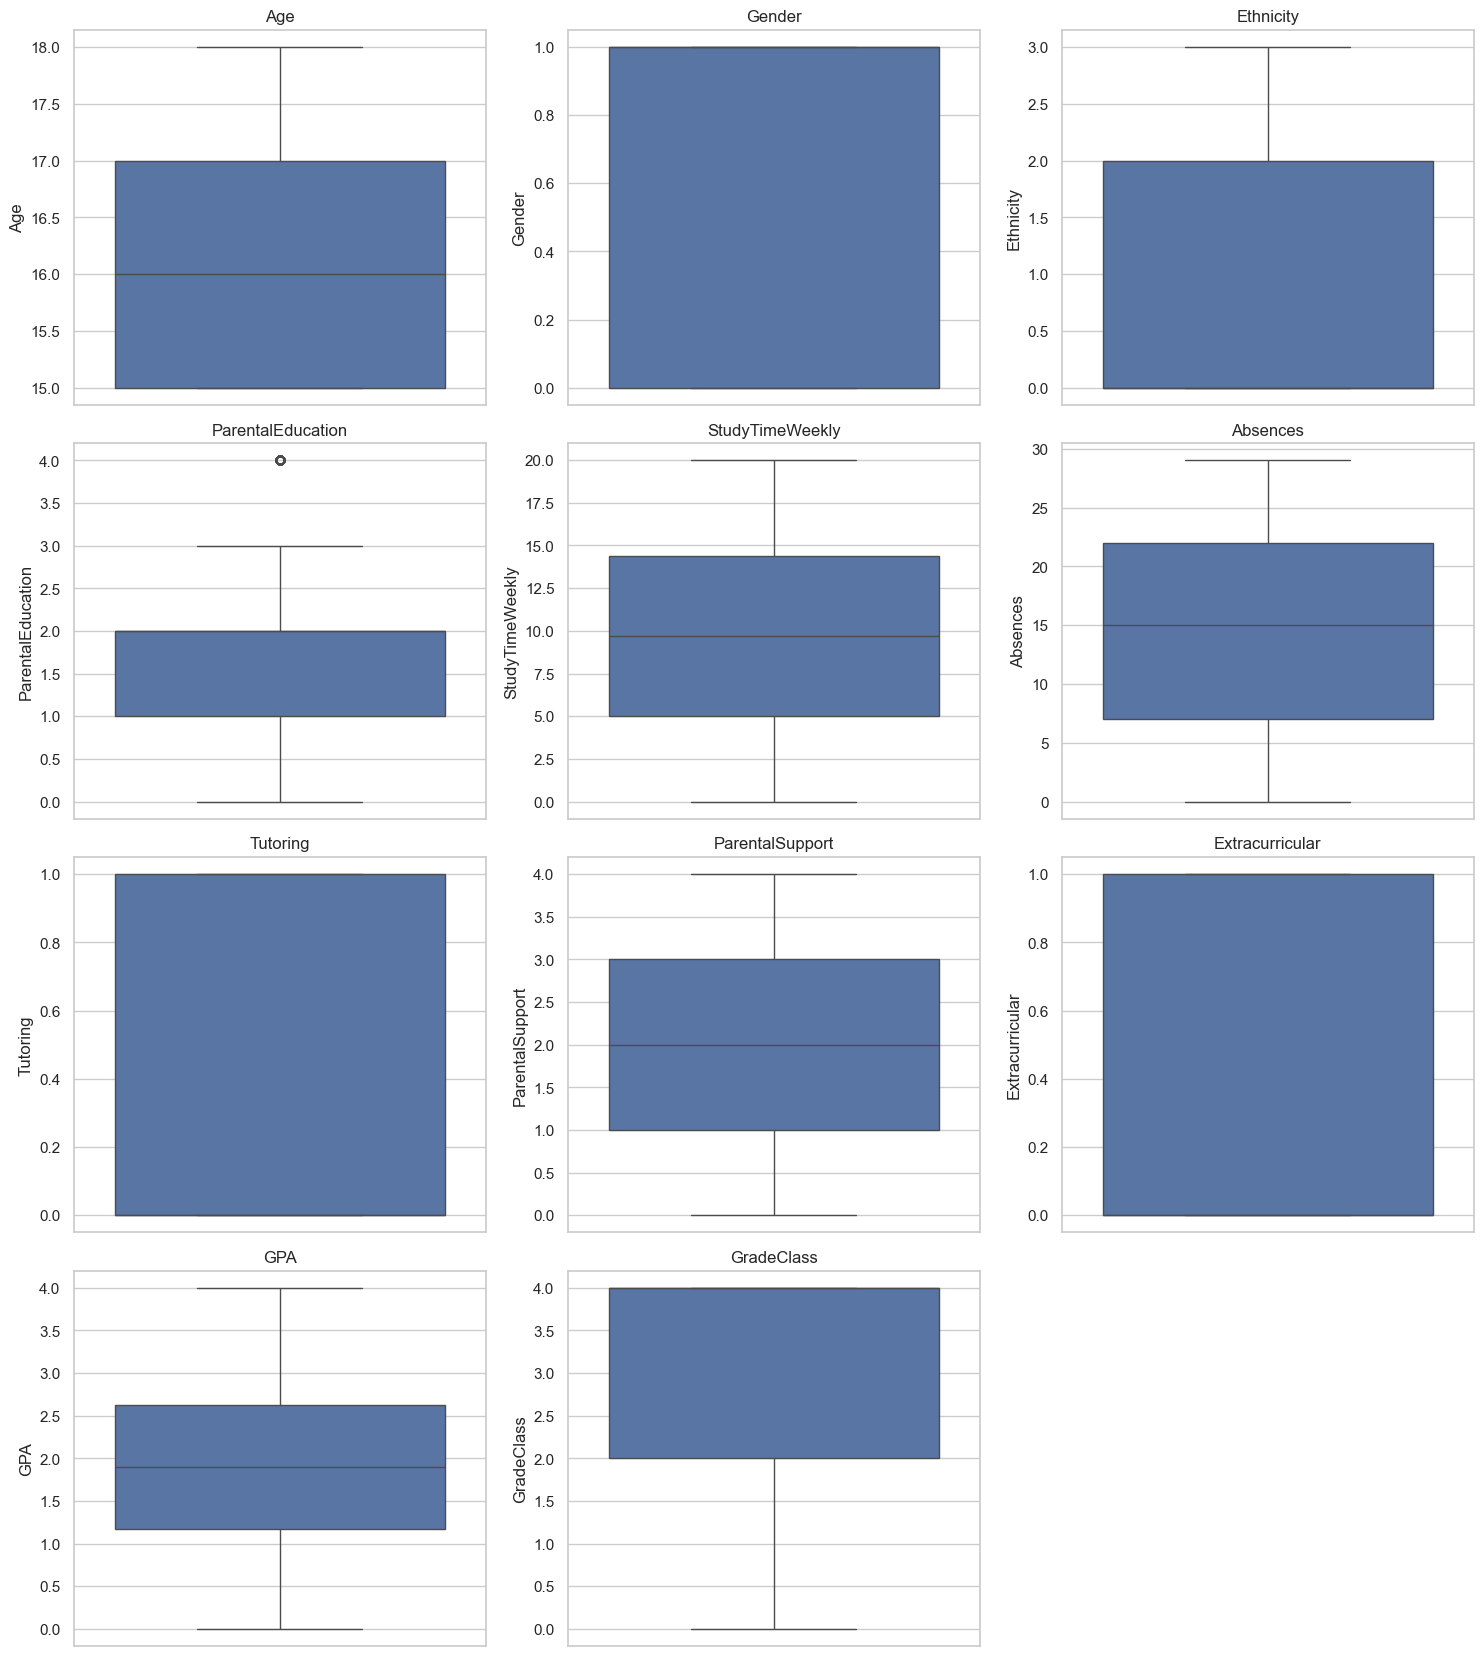

In [357]:
# Exclude unneeded variables
df_cleaned = df.drop(columns=[
   'Music', 'Volunteering','Sports', 'StudentID'
])
# Outer Figure Size
plt.figure(figsize=(15, 25))
for i, col in enumerate(df_cleaned.columns):
# Inner Layout    
    plt.subplot(6, 3, i+1)
    sns.boxplot(df_cleaned[col])
    plt.title(col)
    plt.tight_layout()
plt.show()

### ii. Bivariate Analysis
Is used to examine the relationship between two variables to determine if there is assosiation, correlation or causation between them.

**We will conduct a analysis on the relationships of:** (Gender, Ethnicity, ParentalEducation, StudyTimeWeekly, Absences, Tutoring, ParentalSupport, Extracurricular, Volunteering) with (GPA)

1. Study time weekly does increase GPA but by a small amount.

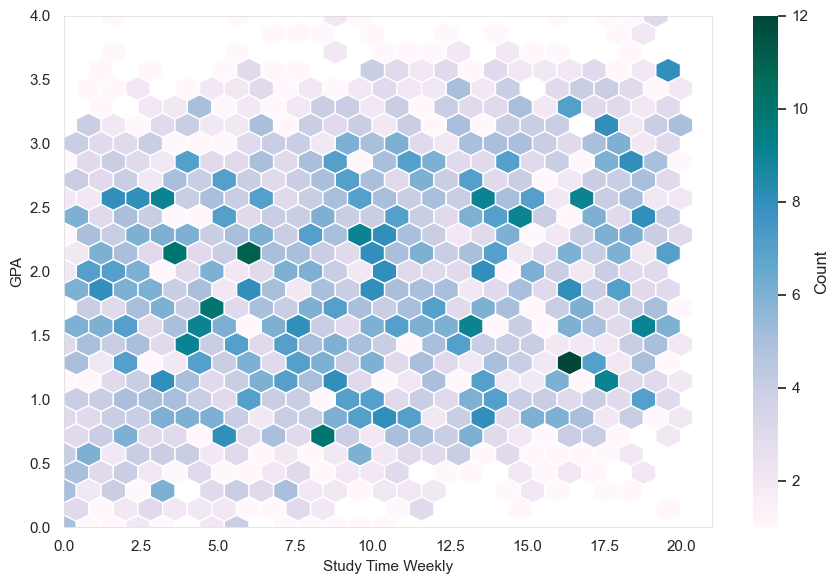

In [358]:
plt.figure(figsize=(9, 6))

# Remove Unneeded Variables
df_cleaned = df.drop(columns=['StudentID','Age','Gender','Ethnicity','ParentalEducation','Tutoring','ParentalSupport','Extracurricular','Sports','Music','Volunteering','GradeClass','Absences'])


# Hexagon Ploting structure
hb = plt.hexbin( df["StudyTimeWeekly"], df["GPA"], gridsize=25, cmap="PuBuGn", mincnt=1, edgecolor="white")  

# Sidebar
cb = plt.colorbar(hb, label="Count")
cb.outline.set_visible(False)

# Axis limits
plt.xlim(0, 21)
plt.ylim(0, 4)

# Labels
plt.xlabel("Study Time Weekly", fontsize=11)
plt.ylabel("GPA", fontsize=11)

# Remove grid
plt.grid(False)

# Axis borders
for spine in plt.gca().spines.values():
    spine.set_color("lightgray")
    spine.set_linewidth(0.4)

plt.tight_layout()
plt.show()

2. Absences had a drastic effect on GPA, the less you stay home the better you do.

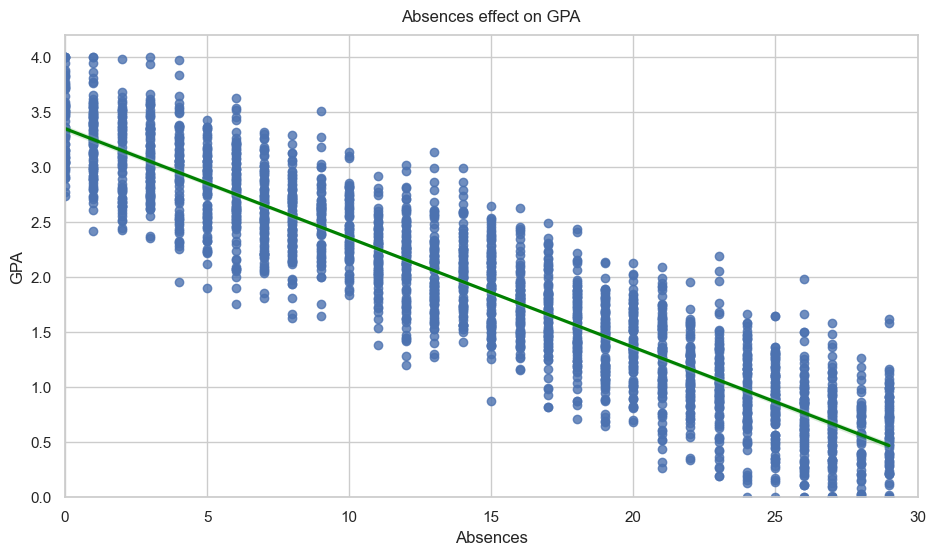

In [359]:

# Remove Unneeded Variables
df_cleaned = df.drop(columns=['StudentID','Age','Gender','Ethnicity','ParentalEducation','StudyTimeWeekly','Tutoring','ParentalSupport','Extracurricular','Sports','Music','Volunteering','GradeClass'])

# Scatter plot with regression line
plt.figure(figsize=(11, 6))
sns.regplot(x="Absences", y="GPA", data=df_cleaned, color="b", line_kws={'color':'green'}) 

# Axis limits
plt.xlim(0, df_cleaned['Absences'].max() + 1)
plt.ylim(0, df_cleaned['GPA'].max() + 0.2)

plt.title("Absences effect on GPA", pad=10)
plt.show()

3. Tutoring has a small effect on GPA.

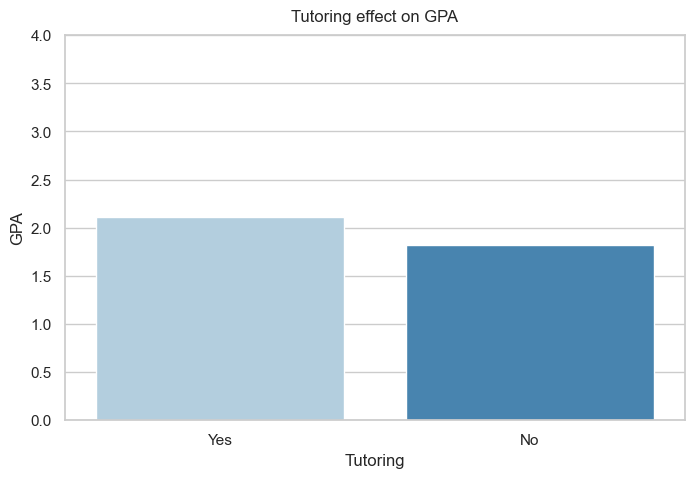

In [360]:
# Remove Unneeded Variables
df_cleaned = df.drop(columns=['StudentID','Age','Gender','Ethnicity','ParentalEducation','StudyTimeWeekly','ParentalSupport','Extracurricular','Sports','Music','Volunteering','GradeClass','Absences'])

# Display 0 as NO and 1 As Yes
if "Tutoring" in df_cleaned.columns: df_cleaned["Tutoring"] = df_cleaned["Tutoring"].map({0: "No", 1: "Yes"})

# Plot
if all(col in df_cleaned.columns for col in ["Tutoring", "GPA"]):
    plt.figure(figsize=(8, 5))
    sns.barplot( data=df_cleaned, x="Tutoring", y="GPA", errorbar=None, palette="Blues", hue="Tutoring" )
    
    # Lable Axis and Titel
    plt.title("Tutoring effect on GPA", pad=10)
    plt.xlabel("Tutoring")
    plt.ylabel("GPA")
    plt.ylim(0, 4.0)
    plt.show()

4. Parental Support had a small effect on GPA.

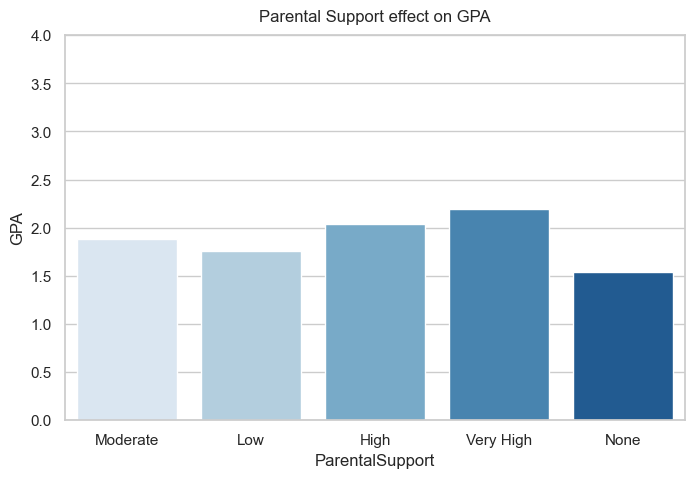

In [361]:
# Remove Unneeded Variables
df_cleaned = df.drop(columns=['StudentID','Age','Gender','Ethnicity','ParentalEducation','StudyTimeWeekly','Absences','Tutoring','Extracurricular','Sports','Music','Volunteering','GradeClass'])

# Display 0 as None, 1 as Low, 2 as Moderate, 3 as High and 4 as Very High
if "ParentalSupport" in df_cleaned.columns: df_cleaned["ParentalSupport"] = df_cleaned["ParentalSupport"].map({0: "None", 1: "Low", 2: "Moderate", 3: "High", 4: "Very High"})

# Plot
if all(col in df_cleaned.columns for col in ["ParentalSupport", "GPA"]):
    plt.figure(figsize=(8, 5))
    sns.barplot( data=df_cleaned, x="ParentalSupport", y="GPA", errorbar=None, palette="Blues", hue="ParentalSupport", legend=False )
    
    # Lable Axis and Titel
    plt.title("Parental Support effect on GPA", pad=10)
    plt.xlabel("ParentalSupport")
    plt.ylabel("GPA")
    plt.ylim(0, 4.0)
    plt.show()

5. Extracurricular had a small effect on GPA.

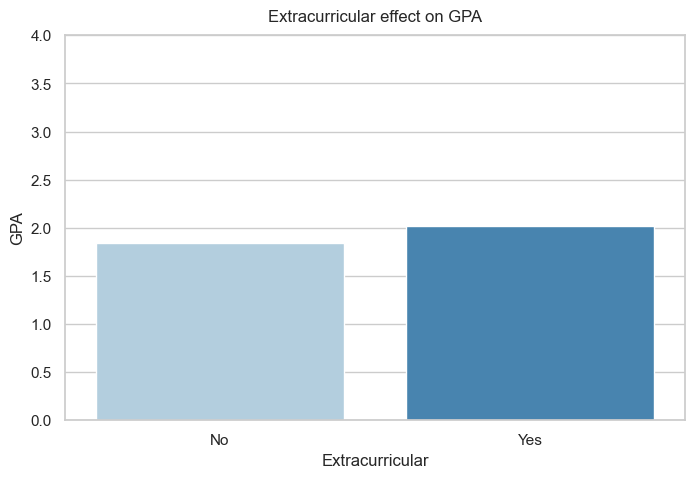

In [362]:
# Remove Unneeded Variables
df_cleaned = df.drop(columns=['StudentID','Age','Gender','Ethnicity','ParentalEducation','StudyTimeWeekly','Absences','Tutoring','ParentalSupport','Sports','Music','Volunteering','GradeClass'])

# Display 0 as NO and 1 As Yes
if "Extracurricular" in df_cleaned.columns: df_cleaned["Extracurricular"] = df_cleaned["Extracurricular"].map({0: "No", 1: "Yes"})

# Plot
if all(col in df_cleaned.columns for col in ["Extracurricular", "GPA"]):
    plt.figure(figsize=(8, 5))
    sns.barplot( data=df_cleaned, x="Extracurricular", y="GPA", errorbar=None, palette="Blues", hue="Extracurricular", legend=False )
    
    # Lable Axis and Titel
    plt.title("Extracurricular effect on GPA", pad=10)
    plt.xlabel("Extracurricular")
    plt.ylabel("GPA")
    plt.ylim(0, 4.0)
    plt.show()

6. Ethnicity had no effect on GPA.

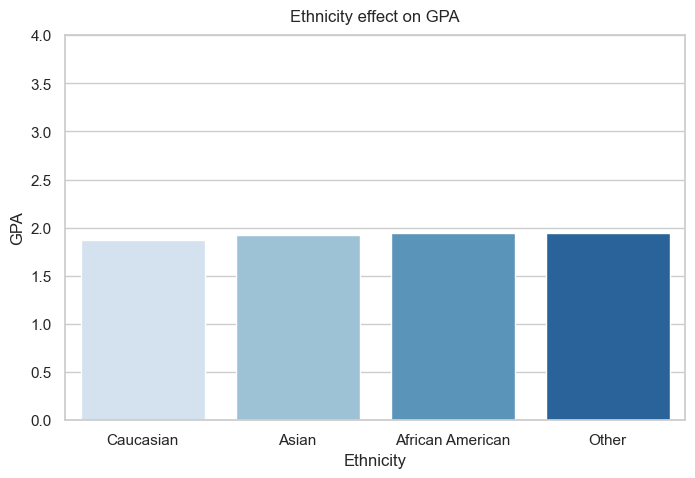

In [363]:
# Remove Unneeded Variables
df_cleaned = df.drop(columns=['StudentID','Age','Gender','ParentalEducation','StudyTimeWeekly','Absences','Tutoring','ParentalSupport','Extracurricular','Sports','Music','Volunteering','GradeClass'])

# Display 0 as Caucasian, 1 as African American, 2 as Asian and 3 as Other 
if "Ethnicity" in df_cleaned.columns: df_cleaned["Ethnicity"] = df_cleaned["Ethnicity"].map({0: "Caucasian", 1: "African American", 2: "Asian", 3: "Other"})

# Plot
if all(col in df_cleaned.columns for col in ["Ethnicity", "GPA"]):
    plt.figure(figsize=(8, 5))
    sns.barplot( data=df_cleaned, x="Ethnicity", y="GPA", errorbar=None, palette="Blues", hue="Ethnicity", legend=False )
    
    # Lable Axis and Titel
    plt.title("Ethnicity effect on GPA", pad=10)
    plt.xlabel("Ethnicity")
    plt.ylabel("GPA")
    plt.ylim(0, 4.0)
    plt.show()

7. Gender had no effect on GPA.

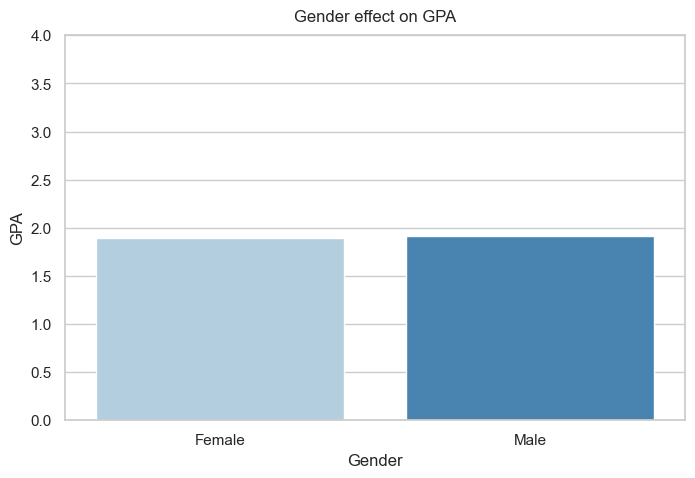

In [364]:
# Remove Unneeded Variables
df_cleaned = df.drop(columns=['StudentID','Age','Ethnicity','ParentalEducation','StudyTimeWeekly','Absences','Tutoring','ParentalSupport','Extracurricular','Sports','Music','Volunteering','GradeClass'])

# Display 0 as Male and 1 as Female
if "Gender" in df_cleaned.columns: df_cleaned["Gender"] = df_cleaned["Gender"].map({0: "Male", 1: "Female"})

# Plot
if all(col in df_cleaned.columns for col in ["Gender", "GPA"]):
    plt.figure(figsize=(8, 5))
    sns.barplot( data=df_cleaned, x="Gender", y="GPA", errorbar=None, palette="Blues", hue="Gender", legend=False )
    
    # Lable Axis and Titel
    plt.title("Gender effect on GPA", pad=10)
    plt.xlabel("Gender")
    plt.ylabel("GPA")
    plt.ylim(0, 4.0)
    plt.show()

8. Perental Education had a small effect on GPA.

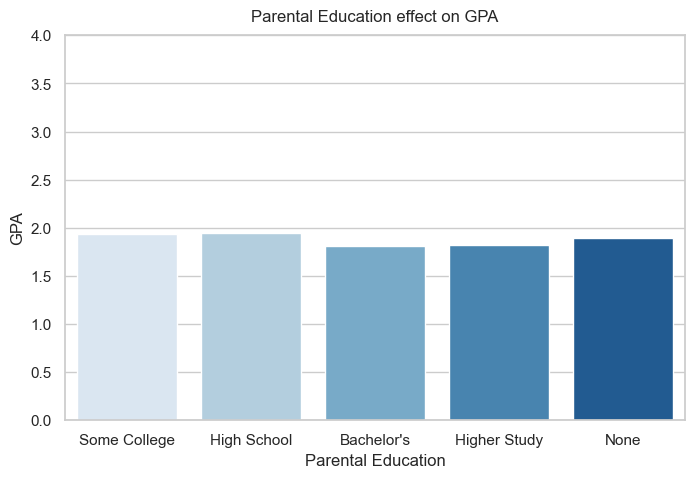

In [365]:
# Remove Unneeded Variables
df_cleaned = df.drop(columns=['StudentID','Age','Gender','Ethnicity','StudyTimeWeekly','Absences','Tutoring','ParentalSupport','Extracurricular','Sports','Music','Volunteering','GradeClass'])

# Display 0 as None, 1 as High School, 2 as Some College , 3 as Bachelor's  and 4 as Higher Study 
if "ParentalEducation" in df_cleaned.columns: df_cleaned["ParentalEducation"] = df_cleaned["ParentalEducation"].map({0: "None", 1: "High School", 2: "Some College", 3: "Bachelor's", 4: "Higher Study"})

# Plot
if all(col in df_cleaned.columns for col in ["ParentalEducation", "GPA"]):
    plt.figure(figsize=(8, 5))
    sns.barplot( data=df_cleaned, x="ParentalEducation", y="GPA", errorbar=None, palette="Blues", hue="ParentalEducation", legend=False )
    
    # Lable Axis and Titel
    plt.title("Parental Education effect on GPA", pad=10)
    plt.xlabel("Parental Education")
    plt.ylabel("GPA")
    plt.ylim(0, 4.0)
    plt.show()

9. Age had no effect on GPA.

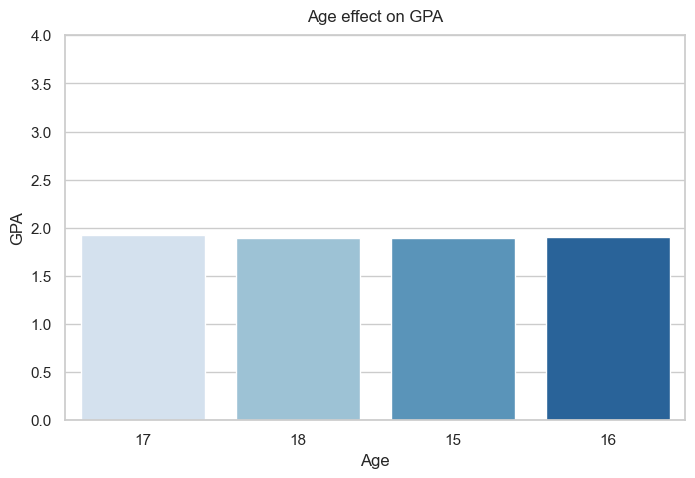

In [366]:
# Remove Unneeded Variables
df_cleaned = df.drop(columns=['StudentID','Gender','Ethnicity','StudyTimeWeekly','Absences','Tutoring','ParentalSupport','Extracurricular','Sports','Music','Volunteering','GradeClass'])

# Display 0 as 15, 1 as 16, 2 as 17 and 3 as 18 
if "Age" in df_cleaned.columns: df_cleaned["Age"] = df_cleaned["Age"].map({15: "15", 16: "16", 17: "17", 18: "18"})

# Plot
if all(col in df_cleaned.columns for col in ["Age", "GPA"]):
    plt.figure(figsize=(8, 5))
    sns.barplot( data=df_cleaned, x="Age", y="GPA", errorbar=None, palette="Blues", hue="Age", legend=False )
    
    # Lable Axis and Titel
    plt.title("Age effect on GPA", pad=10)
    plt.xlabel("Age")
    plt.ylabel("GPA")
    plt.ylim(0, 4.0)
    plt.show()

# --------------------------------------------------------
## 6. 🧹 Missing Value and Outlier Treatment
*Waldo*

Clean the mess before modeling.

In [367]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


## Missing value treatment
From the above we can see all the above columns have the **same non-null count of 2392** meaning that there are **no missing values**

## Outlier Treatment

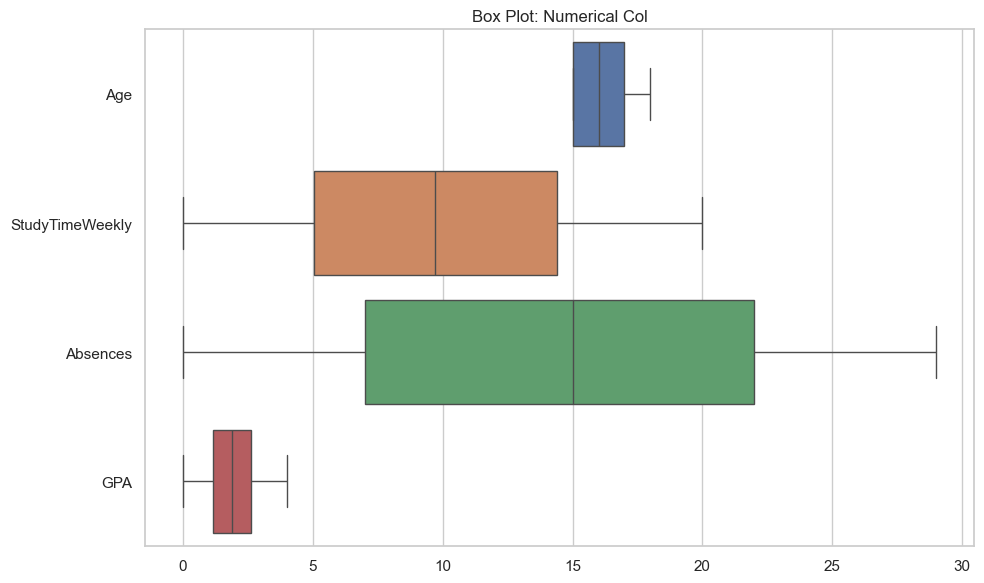

Column Age has 0 outliers.
Column StudyTimeWeekly has 0 outliers.
Column Absences has 0 outliers.
Column GPA has 0 outliers.


In [368]:
#We are only doing outlier treatment on the numerical variables not the categorical variables
# Select numerical columns for box plots
numeric_cols = ['Age', 'StudyTimeWeekly', 'Absences', 'GPA']

#Draw box plot to check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numeric_cols], orient='h')
plt.title('Box Plot: Numerical Col')
plt.tight_layout()
plt.show()

#Check for outliers via coding to double check that there are infact no outliers
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Column {col} has {len(outliers)} outliers.")

From the above we can see there are **no outliers present** in the numerical data

## Data cleaning (Dropping columns and scaling the data)

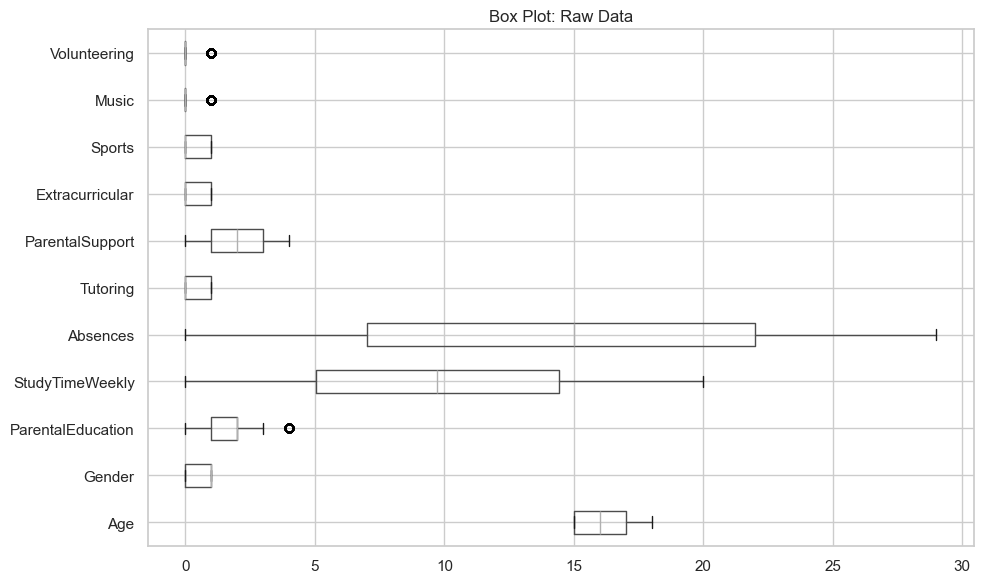

In [369]:
# Define features by dropping columns and getting the remaining column names
features = df.drop(['GradeClass', 'GPA', 'StudentID', 'Ethnicity'], axis=1).columns 


# Create box plot
fig, ax = plt.subplots(figsize=(10, 6))
boxplot = df[features].boxplot(vert=False, ax=ax)  
ax.set_title('Box Plot: Raw Data')
plt.tight_layout()  
plt.show()

**Explanation of why we dropped certain features:** GradeClass is our target variable. GradeClass is calculated based on the GPA thus GPA is directly related to the output variable so we drop that aswell. StudentID and Ethnicity has no effect of the GradeClass variable thus those columns are dropped.

**What the box plot tells us:** We can see Absences and StudyTimeWeekly are much larger than the rest of the data set. Thus scaling will be needed.

## Scaling of the data & Exporting the prepped data
We are going to be using a standard scaler. The data is going to be exported into two csv files: one without scaling and one with scaling. This is done as some algorithms require scaling while others do not.

Scaled data exported to 'Student_performance_prepped_data.csv'
Prepped data without scaling exported to 'Student_performance_non_scaled.csv'


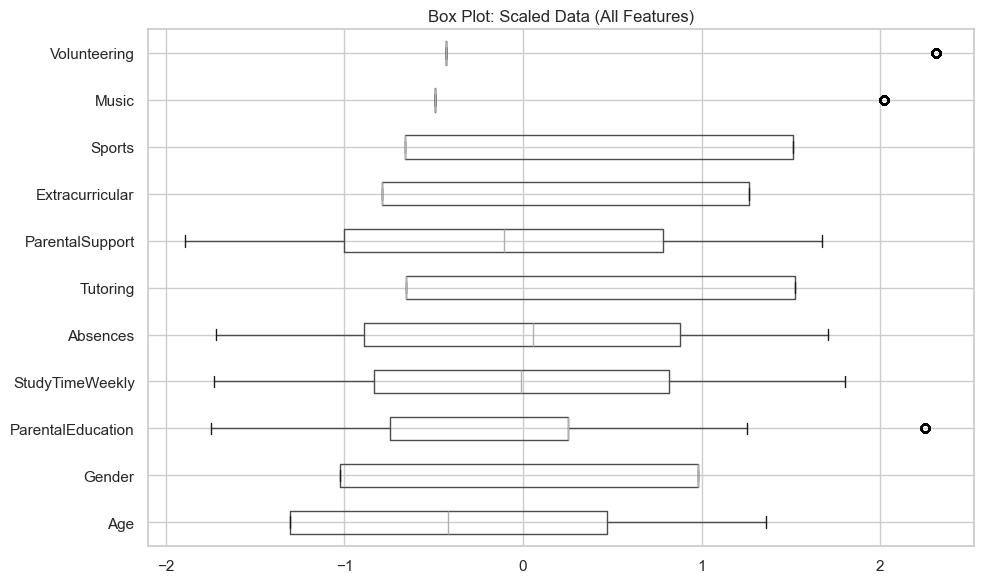

In [370]:
# Assuming df is your DataFrame

# Prepare features and target
X = df[features]
y = df['GradeClass']

# Initialize the scaler
scaler = StandardScaler()

# Scale all feature columns
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=features)

# Combine scaled features with target
scaled_data = pd.concat([X_scaled, y.rename('GradeClass').reset_index(drop=True)], axis=1)
X_export = pd.concat([X, y.rename('GradeClass').reset_index(drop=True)], axis=1)

# Export to CSV
scaled_data.to_csv('Student_performance_scaled.csv', index=False)
print("Scaled data exported to 'Student_performance_prepped_data.csv'")

X_export.to_csv('Student_performance_non_scaled.csv', index=False)
print("Prepped data without scaling exported to 'Student_performance_non_scaled.csv'")

# Create a boxplot for all scaled feature columns to verify the data has been scaled
fig, ax = plt.subplots(figsize=(10, 6))
boxplot = X_scaled.boxplot(vert=False, ax=ax)
ax.set_title('Box Plot: Scaled Data (All Features)')
plt.tight_layout()
plt.show()

# --------------------------------------------------------
## 7. 🎯 Evaluation Metrics for Classification Problem
*Erin*

### How will we know if the model is good?
We'll evaluate the trained models on a set 

Common classification metrics:
-   Accuracy
-   Precision
-   Recall
-   F1-score
-   Confusion matrix

# --------------------------------------------------------
## 8. 🧠 Feature Engineering
Make the data smarter

<style type="text/css">
#T_9802c th {
  background-color: #2a2a2e;
  color: white;
  text-align: center;
}
#T_9802c td {
  text-align: center;
}
#T_9802c_row0_col0, #T_9802c_row0_col1, #T_9802c_row0_col2, #T_9802c_row0_col3, #T_9802c_row0_col4, #T_9802c_row1_col0, #T_9802c_row1_col1, #T_9802c_row1_col2, #T_9802c_row1_col3, #T_9802c_row1_col4, #T_9802c_row2_col0, #T_9802c_row2_col1, #T_9802c_row2_col2, #T_9802c_row2_col3, #T_9802c_row2_col4, #T_9802c_row3_col0, #T_9802c_row3_col1, #T_9802c_row3_col2, #T_9802c_row3_col3, #T_9802c_row3_col4, #T_9802c_row4_col0, #T_9802c_row4_col1, #T_9802c_row4_col2, #T_9802c_row4_col3, #T_9802c_row4_col4, #T_9802c_row5_col0, #T_9802c_row5_col1, #T_9802c_row5_col2, #T_9802c_row5_col3, #T_9802c_row5_col4 {
  border: 1px solid gray;
}
</style>
<table id="T_9802c">
  <caption>Compatibility of Feature Types with Selected ML Models</caption>
  <thead>
    <tr>
      <th class="blank level0" >&nbsp;</th>
      <th id="T_9802c_level0_col0" class="col_heading level0 col0" >Feature Engineering Type</th>
      <th id="T_9802c_level0_col1" class="col_heading level0 col1" >Logistic Regression</th>
      <th id="T_9802c_level0_col2" class="col_heading level0 col2" >Random Forest</th>
      <th id="T_9802c_level0_col3" class="col_heading level0 col3" >XGBoost</th>
      <th id="T_9802c_level0_col4" class="col_heading level0 col4" >Deep Learning</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th id="T_9802c_level0_row0" class="row_heading level0 row0" >0</th>
      <td id="T_9802c_row0_col0" class="data row0 col0" >Encoding Categorical Variables</td>
      <td id="T_9802c_row0_col1" class="data row0 col1" >✅ Required</td>
      <td id="T_9802c_row0_col2" class="data row0 col2" >✅ Optional</td>
      <td id="T_9802c_row0_col3" class="data row0 col3" >✅ Optional</td>
      <td id="T_9802c_row0_col4" class="data row0 col4" >✅ Required</td>
    </tr>
    <tr>
      <th id="T_9802c_level0_row1" class="row_heading level0 row1" >1</th>
      <td id="T_9802c_row1_col0" class="data row1 col0" >Scaling Numerical Features</td>
      <td id="T_9802c_row1_col1" class="data row1 col1" >✅ Yes</td>
      <td id="T_9802c_row1_col2" class="data row1 col2" >❌ Not needed</td>
      <td id="T_9802c_row1_col3" class="data row1 col3" >❌ Not needed</td>
      <td id="T_9802c_row1_col4" class="data row1 col4" >✅ Yes</td>
    </tr>
    <tr>
      <th id="T_9802c_level0_row2" class="row_heading level0 row2" >2</th>
      <td id="T_9802c_row2_col0" class="data row2 col0" >Interaction Features</td>
      <td id="T_9802c_row2_col1" class="data row2 col1" >✅ Improves linearity</td>
      <td id="T_9802c_row2_col2" class="data row2 col2" >✅ Fine</td>
      <td id="T_9802c_row2_col3" class="data row2 col3" >✅ Great</td>
      <td id="T_9802c_row2_col4" class="data row2 col4" >✅ Useful</td>
    </tr>
    <tr>
      <th id="T_9802c_level0_row3" class="row_heading level0 row3" >3</th>
      <td id="T_9802c_row3_col0" class="data row3 col0" >Ratio & Aggregate Features</td>
      <td id="T_9802c_row3_col1" class="data row3 col1" >✅ Often helps</td>
      <td id="T_9802c_row3_col2" class="data row3 col2" >✅ Great</td>
      <td id="T_9802c_row3_col3" class="data row3 col3" >✅ Great</td>
      <td id="T_9802c_row3_col4" class="data row3 col4" >✅ Very good</td>
    </tr>
    <tr>
      <th id="T_9802c_level0_row4" class="row_heading level0 row4" >4</th>
      <td id="T_9802c_row4_col0" class="data row4 col0" >Requires Categorical Encoding</td>
      <td id="T_9802c_row4_col1" class="data row4 col1" >✅ Required</td>
      <td id="T_9802c_row4_col2" class="data row4 col2" >✅ Optional</td>
      <td id="T_9802c_row4_col3" class="data row4 col3" >✅ Optional</td>
      <td id="T_9802c_row4_col4" class="data row4 col4" >✅ Required</td>
    </tr>
    <tr>
      <th id="T_9802c_level0_row5" class="row_heading level0 row5" >5</th>
      <td id="T_9802c_row5_col0" class="data row5 col0" >Requires Scaling</td>
      <td id="T_9802c_row5_col1" class="data row5 col1" >✅ Yes</td>
      <td id="T_9802c_row5_col2" class="data row5 col2" >❌ Not needed</td>
      <td id="T_9802c_row5_col3" class="data row5 col3" >❌ Not needed</td>
      <td id="T_9802c_row5_col4" class="data row5 col4" >✅ Yes</td>
    </tr>
  </tbody>
</table>

<style type="text/css">
#T_22d9a th {
  background-color: #2a2a2e;
  color: white;
  text-align: center;
}
#T_22d9a td {
  text-align: left;
}
#T_22d9a_row0_col0, #T_22d9a_row0_col1, #T_22d9a_row0_col2, #T_22d9a_row1_col0, #T_22d9a_row1_col1, #T_22d9a_row1_col2, #T_22d9a_row2_col0, #T_22d9a_row2_col1, #T_22d9a_row2_col2, #T_22d9a_row3_col0, #T_22d9a_row3_col1, #T_22d9a_row3_col2, #T_22d9a_row4_col0, #T_22d9a_row4_col1, #T_22d9a_row4_col2 {
  border: 1px solid gray;
}
</style>
<table id="T_22d9a">
  <caption>Why and Where Each Feature Engineering Technique Is Useful</caption>
  <thead>
    <tr>
      <th class="blank level0" >&nbsp;</th>
      <th id="T_22d9a_level0_col0" class="col_heading level0 col0" >Feature Type</th>
      <th id="T_22d9a_level0_col1" class="col_heading level0 col1" >Why It's Useful</th>
      <th id="T_22d9a_level0_col2" class="col_heading level0 col2" >Needed For</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th id="T_22d9a_level0_row0" class="row_heading level0 row0" >0</th>
      <td id="T_22d9a_row0_col0" class="data row0 col0" >Encoding Categoricals</td>
      <td id="T_22d9a_row0_col1" class="data row0 col1" >Converts labels to usable format</td>
      <td id="T_22d9a_row0_col2" class="data row0 col2" >LogReg, DL</td>
    </tr>
    <tr>
      <th id="T_22d9a_level0_row1" class="row_heading level0 row1" >1</th>
      <td id="T_22d9a_row1_col0" class="data row1 col0" >Interaction Features</td>
      <td id="T_22d9a_row1_col1" class="data row1 col1" >Captures nonlinear relationships</td>
      <td id="T_22d9a_row1_col2" class="data row1 col2" >All models</td>
    </tr>
    <tr>
      <th id="T_22d9a_level0_row2" class="row_heading level0 row2" >2</th>
      <td id="T_22d9a_row2_col0" class="data row2 col0" >Ratio/Aggregate</td>
      <td id="T_22d9a_row2_col1" class="data row2 col1" >Creates informative summaries</td>
      <td id="T_22d9a_row2_col2" class="data row2 col2" >All models</td>
    </tr>
    <tr>
      <th id="T_22d9a_level0_row3" class="row_heading level0 row3" >3</th>
      <td id="T_22d9a_row3_col0" class="data row3 col0" >Scaling</td>
      <td id="T_22d9a_row3_col1" class="data row3 col1" >Prevents skew in distance-based methods</td>
      <td id="T_22d9a_row3_col2" class="data row3 col2" >LogReg, DL</td>
    </tr>
    <tr>
      <th id="T_22d9a_level0_row4" class="row_heading level0 row4" >4</th>
      <td id="T_22d9a_row4_col0" class="data row4 col0" >Binning/Flags (optional)</td>
      <td id="T_22d9a_row4_col1" class="data row4 col1" >Increases interpretability, simplifies complexity</td>
      <td id="T_22d9a_row4_col2" class="data row4 col2" >All models (optional)</td>
    </tr>
  </tbody>
</table>

### 1.      Encoding Categorical Variables
-   Label Encoding (for ordinal data)
-   One-Hot Encoding (for nominal data)

### 2.     Scaling Numerical Features
-   StandardScaler, MinMaxScaler, or RobustScaler
-   (Important for Logistic Regression & Deep Learning)

### 3.     Binning
-   Converting numerical features into categorical bins (e.g. age groups)

### 4.     Interaction Features
*Waldo*
-   Multiplying or combining features to capture interactions
-   E.g., StudyTimeWeekly * ParentalSupport

### 5.     Ratio and Aggregate Features
*Waldo*
-   Creating ratios like StudyTimeWeekly / Absences
-   Aggregates like TotalExtracurricular = Sports + Music + Volunteering

### 6.     Polynomial Features
-   Squared/cubed versions of features (mostly for linear models)

### 7.     Feature Selection / Dimensionality Reduction
-   Using techniques like PCA, SelectKBest, or feature importance to reduce inputs

### 8.     Domain-Specific Features
-   Custom logic based on domain knowledge, e.g., a “high risk” flag for absences > 20

# --------------------------------------------------------
## 9. 🤖 Model Building: Part 1 (Baseline ML Models)
Try classic algorithms (LogReg, RF, XGBoost).

follow steps
-   train models
-   evaluate using metrics from step 7.

### i.    Logistic Regression

### ii.    Random Forest

### iii.    XGBoost

# --------------------------------------------------------
## 10. 🤖 Model Building: Part 2 (Deep Learning)
*Erin*

Build and train a neural network.

# --------------------------------------------------------
## 11. 🚀 Model Deployment – Dash App
*Erin*

Bring it to life in a web app.

In [371]:
import dash
from dash import html, dcc
app = dash.Dash(__name__)
app.layout = html.Div([...])
app.run_server(debug=True)

ModuleNotFoundError: No module named 'dash'